<a href="https://colab.research.google.com/github/Subham47/Python-beginner-projects/blob/master/ccas_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/trainfolder/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (16).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (15).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (18).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (17).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (19).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (20).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (21).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (22).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (23).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/2021-06-18 (3) - Copy.png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/2021-06-18 (2).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/Screenshot (24).png
/content/gdrive/MyDrive/trainfolder/train/illegal_driving/2

In [ ]:

# basic librareis
import zipfile
import glob
import os
import pandas as pd
import numpy as np
from PIL import Image
# plotting and visualizations
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import missingno as msno
# preprocessing
from keras.preprocessing.image import (ImageDataGenerator, 
                                       img_to_array, 
                                       array_to_img, 
                                       load_img)

from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import (confusion_matrix, 
                             classification_report, 
                             accuracy_score, 
                             f1_score, 
                             roc_auc_score)
# modeling
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.models import Model,Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense,Flatten

from keras.applications import resnet50
from keras.applications.resnet50 import preprocess_input
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping,LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau



from keras import backend as K
K.clear_session()

# model plotting
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

# mesc
from sklearn.utils import shuffle

print('!Done')

!Done


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl
print(tf.__version__)

2.5.0


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
print('!Done')

!Done


In [ ]:
#Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Convolution2D(64, 3, 3, input_shape = (64,64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform',input_dim=11))
classifier.add(Dense(1,activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/trainfolder/train',
                                                 target_size = (64,64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/trainfolder/validation',
                                            target_size = (64,64),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 316 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
classifier.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
classifier.fit_generator(training_set,# the training set
                         #steps_per_epoch = 80,
                         epochs = 10,# number of epochs 
                         validation_data = test_set)# the test set
                         #max_queue_size = 2000)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 309s 15s/step - loss: 0.6486 - accuracy: 0.6322 - val_loss: 0.4840 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 10s 500ms/step - loss: 0.4192 - accuracy: 0.9024 - val_loss: 0.1003 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 10s 501ms/step - loss: 0.1557 - accuracy: 0.9606 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 10s 499ms/step - loss: 0.0572 - accuracy: 0.9787 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 10s 498ms/step - loss: 0.0466 - accuracy: 0.9807 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 10s 499ms/step - loss: 0.0856 - accuracy: 0.9755 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 10s 501ms/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 0.0033 - val_accuracy: 1.0000


In [ ]:
test_set.class_indices

{'illegal_driving': 0, 'normal_driving': 1}

In [ ]:
test_it='/content/gdrive/MyDrive/trainfolder/test/'

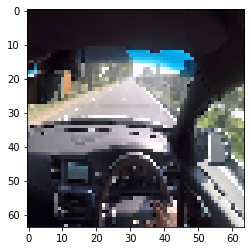

normal driving


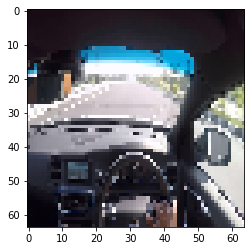

normal driving


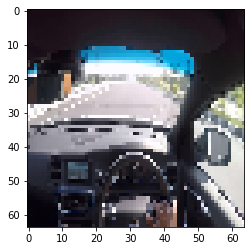

normal driving


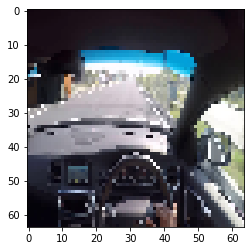

normal driving


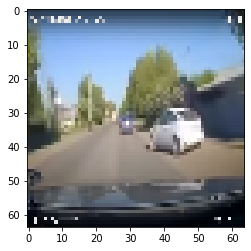

illegal driving
Transfer info to adjacent vehicle


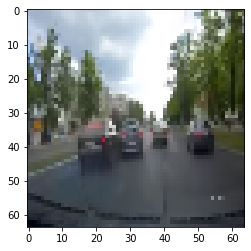

illegal driving
Hop to next node


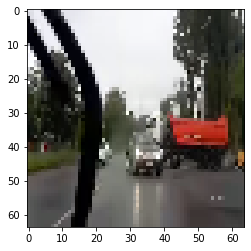

illegal driving
Hop to next node


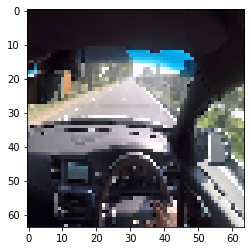

normal driving


In [ ]:
for i in os.listdir(test_it):
    img = image.load_img(test_it + i,target_size=(64,64,3))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    prediction = classifier.predict(images)
    if prediction==0:
        print("illegal driving")
        import random
        th_rssi=55
        curr_rssi=random.random()*100
        if curr_rssi<th_rssi:
            print("Hop to next node")
        else:
            print("Transfer info to adjacent vehicle")
    else:
        print("normal driving")

In [ ]:
#img=plt.imread('/content/gdrive/MyDrive/trainfolder/test/illegal_driving/2021-06-18 (11).png')
#img_path = '/content/gdrive/MyDrive/trainfolder/test/illegal_driving/2021-06-18 (11).png'
#plt.imshow(img)
#plt.show()
#img = image.load_img(img_path, target_size=(64, 64, 3))
"""img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
prediction = classifier.predict(img_preprocessed)
if prediction==0:
    print("legal")
else:
    print("illegal")"""